# Tarea 1: Pokemon data analysis
Giorgos Galanaquis and Matias Hendolin

Machine learning in astronomy AST332 2/2025


In this exercise we perform a data analysis to data about Pokemon. We begin with exploratory data analysis (EDA) to get to know the data. We continue to investigate interesting patterns by calculating important statistical parameters. Then we plot the correlation of data to find how the variables are related to each other. Finally, we summarize the data analysis by concluding the most important features of the data.

Some useful links for working:

https://seaborn.pydata.org/examples/index.html

Our data:

https://www.kaggle.com/datasets/rounakbanik/pokemon

In [ ]:
# If you want to save the manipulated csv to work on the exact same
# (not probably necessary since we have the same data and do the same
# operations on it every time) you can use the following code:

# Assuming you already ran the code to load and manipulate the DataFrame 'df'

# Write the modified DataFrame to a new CSV file in your Drive
#df.to_csv('/content/drive/MyDrive/my_updated_data.csv', index=False)

# 0. Introduction and description of data

Debe explicar los datos que escoge, la información de la columna, y cualquier antecedente
importante para poder

The data contains the information and statistics of Pokemon from different generations. It includes their abilities, types, multipliers against other types, healthpoints and other essential data for playing the Pokemon game.

The most important data for data analysis are most likely the statistics used when Pokemon battle each other. These include the Pokemon's type, which defines the multipliers that are applied to the attack of the Pokemon. Also, speed, defence, special attack and defense are attributes, that define the battling of the Pokemon.

From the data we can try to find how the type of the Pokemon affects different attributes. Also, relations of weight to hitpoints (HP) and other numberical values might be important.

The main goal of this exercise is to analyse the data and find relation of the variables. Also, we want to interpret the data in a comprehensible way, of which one can make conclusions about the data. The secondary goal is to try to find the best combination of Pokemon type combined with other attributes.

# 1. Data importation and preliminary analysis

We start by importing all the libraries, connecting to a Google drive and downloading the data to the notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
# We first import these libraries to run all the data csv analysis and also to plot this same data

# This line sets a seaborn parameter to show all plots
# with a white grid background, obtained from the titanic.ipynb notebook
sns.set_style('whitegrid')

from google.colab import drive
drive.mount('/content/drive')
pokemon = pd.read_csv('drive/MyDrive/Courses/MachineLearning/Tarea1/pokemon.csv') # To show the first look at the Pokemon.csv data

# For Giorgos to run it:
#drive.mount('/content/drive')
#pokemon=pd.read_csv('drive/MyDrive/machine_learning/pokemon.csv')

Mounted at /content/drive


In [6]:
pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [3]:
# Get the total number of rows, i.e. how many Pokemon there are
total_rows = pokemon.shape[0]
print(f"\nTotal number of rows: {total_rows}")
# Get the total number of columns, i.e. different attributes
print("Amount of columns",len(pokemon.iloc[0]))


Total number of rows: 801
Amount of columns 41


It is a good practise to investigate what kind of values and in which value range the columns contain. For instance, we see that the attack, defense and hp (hitpoints) are generally between 40-150. And for instance generation ranges from 1 to 7 whilst is_legendary column is Boolean. Let us see more closely with coding that what kind of data the columns contain.



In [4]:
# The 1st column corresponds to lists with 1 to 3 strings inside of them.
pokemon["abilities"]

,abilities
0,"['Overgrow', 'Chlorophyll']"
1,"['Overgrow', 'Chlorophyll']"
2,"['Overgrow', 'Chlorophyll']"
3,"['Blaze', 'Solar Power']"
4,"['Blaze', 'Solar Power']"
...,...
796,['Beast Boost']
797,['Beast Boost']
798,['Beast Boost']
799,['Prism Armor']


In [5]:
# From the 2nd to 19th column we see they're all composed of floats that posses only the values 0., 0.25, 0.5, 1., 2. and 4.
# For example the "against_bug" column:
pokemon["against_bug"]

,against_bug
0,1.00
1,1.00
2,1.00
3,0.50
4,0.50
...,...
796,0.25
797,1.00
798,2.00
799,2.00


Let us create a list of Pokemon types in alphabetical order for future use:

In [6]:
# Prompt given to ChatGPT: give me a python list with all the pokemon types in alphabetical order as strings. Example: ["bug","dark",...,"water"]
pokemon_types = [
    "bug",
    "dark",
    "dragon",
    "electric",
    "fairy",
    "fighting",
    "fire",
    "flying",
    "ghost",
    "grass",
    "ground",
    "ice",
    "normal",
    "poison",
    "psychic",
    "rock",
    "steel",
    "water"
]

In [7]:
# This code allows to search all the different values that the against_type columns contain
i=0
j=0
unique_values = np.array([], dtype=int)
while j < len(pokemon_types):
  while i < len(pokemon):
      value_specific = pokemon["against_"+pokemon_types[j]][i]
      if value_specific not in unique_values:
          unique_values = np.append(unique_values, value_specific)
      i+=1
  j+=1
unique_values.sort()
print("Unique values from the 2nd to 19th columns:",unique_values)
print("Amount of different values from the 2nd to 19th columns:",len(unique_values))

Unique values from the 2nd to 19th columns: [0.25 0.5  1.   2.   4.  ]
Amount of different values from the 2nd to 19th columns: 5


Then we study how many null values there are and in which columns:

In [8]:
# These are the null values of all the columns
null_counts = pokemon.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
g

We notice how some Pokemon are missing their height and weight data. It seems that the Pokemon either have both or neither. Going throught the 20 nulls manually to see what is the case, we confirm that there are 20 Pokemon that have neither the height nor weigth and the rest have both. Also, 384 Pokemon do not have a second type, which is as a percentage:

In [9]:
print(null_counts.type2/total_rows)

0.4794007490636704


So, approximately 48% of the Pokemon do not have a second type, meaning, that over half of the Pokemon do.

We also notice how 98 Pokemon do not have the percentage_male, meaning that most likely they are always female. That as a percentage is:

In [10]:
print(null_counts.percentage_male/total_rows)

0.12234706616729088


Which is approximately 12%.

With these null values in mind, we clean the data and divide it into different data sets in the next section.

# 2. Data cleaning

- Identificar y manejar valores nulos o faltantes.
- Detectar y eliminar valores duplicados si los hubiera.
- Comentar sobre posibles outliers y cómo podrían influir en el análisis.

In this section we clean the data. We create a data set that does not include any nulls and another that does not contain nulls in numerical columns.

This way we have one data set of all data, one of zero nulls and one of zero numerical nulls for still complete numerical analysis of the data.

Therefore we have three data sets: pokemon, pokemon_zero_nul and pokemon_zero_num_nul.

In [11]:
# This masking allows to obtain which values of height_m are null
# to then apply the inverted mask to obtain a pokemon dataset with only the
# rows with non-null height values
height_m_mask = pokemon["height_m"].isnull()
pokemon_h = pokemon[-height_m_mask]
len(pokemon_h)

781

In [12]:
# The same previous process is made to the weight null values
# to obtain a new non-null weight dataset
weight_kg_mask = pokemon["weight_kg"].isnull()
pokemon_w = pokemon[-weight_kg_mask]
len(pokemon_w)

781

In [13]:
# We test if these two datasets are identical and if yes, we rename them as one
test_h_w_equal = pokemon_h.equals(pokemon_w)
print("Are the null values of height and weight the same?:",test_h_w_equal)
pokemon_hw = pokemon_h

Are the null values of height and weight the same?: True


In [14]:
# Then we create a mask of pokemon with non-null percentage male data,
# which we use to create the data set of no numerical nulls.
percentage_male_mask = pokemon_hw["percentage_male"].isnull()
pokemon_zero_num_nul = pokemon_hw[-percentage_male_mask]
print("Pokemon with non null numerical data:",len(pokemon_zero_num_nul))

Pokemon with non null numerical data: 684


In [15]:
# Then finally we mask the Pokemon that have null value in type2 column.
# This is then used to create the data set of no nulls at all.
type2_mask = pokemon_zero_num_nul["type2"].isnull()
pokemon_zero_nul = pokemon_zero_num_nul[-type2_mask]
print("Pokemon with no numerical nor string nulls:",len(pokemon_zero_nul))

Pokemon with no numerical nor string nulls: 339


We therefore cleaned the data to have, in addition to the original full data, a table of no numerical nulls which allows string nulls and a table of no nulls at all.

We should note, that the table of no numerical nulls contains Pokemon that have either one or two types, whilst the table that has no nulls at all contains only Pokemon that have two types.

Therefore, we create the following tables for clear name convention that represent also the Pokemon:

In [16]:
#pokemon_type1or2 = pokemon_zero_num_nul
#pokemon_type1and2 = pokemon_zero_nul

In [17]:
pokemon_t1or2 = pokemon_zero_num_nul
pokemon_t1and2 = pokemon_zero_nul

For a later part of this exercise, we need completely numerical data sets. This is especially for the heatmap in part 4.

In [18]:
# Elimination of all string data to have new numerical datasets,
# Requisite to plot a heatmap of the numerical data
str_header = ["abilities","classfication","japanese_name","name","type1","type2"]
pokemon_t1or2_num = pokemon_t1or2.drop(columns=str_header)
pokemon_t1and2_num = pokemon_t1and2.drop(columns=str_header)

Also, create a data set without the "against_..." columns.

In [19]:
# List that contains the strings for the "against_..." columns
pokemon_ag_types = [
    "against_bug",
    "against_dark",
    "against_dragon",
    "against_electric",
    "against_fairy",
    "against_fight",
    "against_fire",
    "against_flying",
    "against_ghost",
    "against_grass",
    "against_ground",
    "against_ice",
    "against_normal",
    "against_poison",
    "against_psychic",
    "against_rock",
    "against_steel",
    "against_water"
]

In [20]:
# Creation of new dataset that only contains numerical data without "against_..." columns.
i=0
pokemon_t1or2_num_noag = pokemon_t1or2_num.drop(columns=pokemon_ag_types)
pokemon_t1and2_num_noag = pokemon_t1and2_num.drop(columns=pokemon_ag_types)

3. Análisis estadístico

- Calcular y mostrar estadísticas descriptivas de las variables numéricas (media, mediana,
desviación estándar, etc.).
- Realizar un análisis de las distribuciones de las variables más relevantes.
- We could maybe try to find the best type combination that has the greates value of "against_" columns. But this is not what we should do first :D

In this section we calculate some descriptive parameters such as median, averages and standard deviations of the data. We also make histograms to show the distribution of values of different attributes.

Let us compare the mean, median and standard deviation of the statistics of Pokemon. We compare the data sets of Pokemon that have either one or two types to the Pokemon that have two types.

We take the statistics that are independent against which type the Pokemon is battling, i.e. we leave the "against_" columns out of this analysis. This analysis is therefore about comparing if the amount of types the Pokemon has is beneficial for numerical statistics.

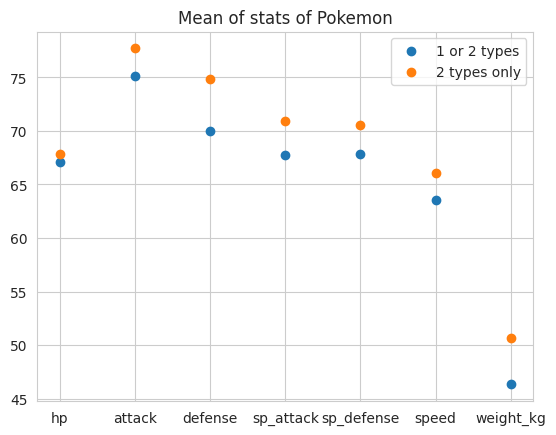

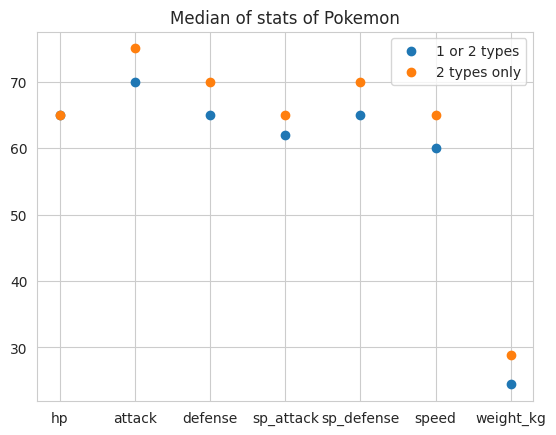

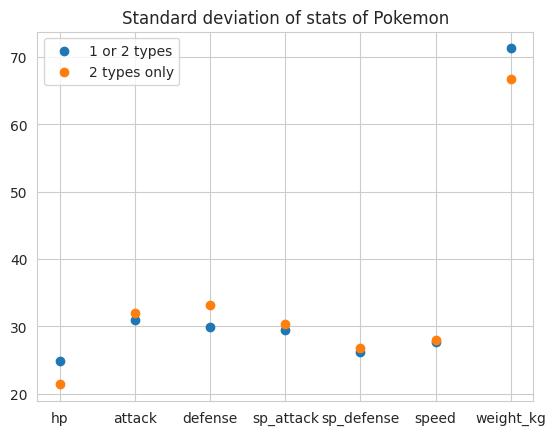

In [21]:
# Compared stats (the columns)
stats = ["hp","attack","defense","sp_attack","sp_defense","speed", "weight_kg"]

# Initialize empty lists for the calculation of:

# Mean
mean_1or2 = []
mean_1and2 = []

# Median
median_1or2 = []
median_1and2 = []

# Standard deviation
std_dev_1or2 = []
std_dev_1and2 = []

# Loop the stats and calculate the parameters, then
# append the parameters to the lists
for stat in stats:
  mean_1or2.append(np.mean(pokemon_t1or2[stat]))
  mean_1and2.append(np.mean(pokemon_t1and2[stat]))
  median_1or2.append(np.median(pokemon_t1or2[stat]))
  median_1and2.append(np.median(pokemon_t1and2[stat]))
  std_dev_1or2.append(np.std(pokemon_t1or2[stat]))
  std_dev_1and2.append(np.std(pokemon_t1and2[stat]))
  #tot_stat_1or2 = sum(mean_1or2)
  #tot_stat_1and2 = sum(mean_1and2)

# Plot mean as a scatter plot
plt.scatter(stats,mean_1or2,label="1 or 2 types")
plt.scatter(stats,mean_1and2,label="2 types only")
plt.legend()
plt.title("Mean of stats of Pokemon")
plt.show()

# Plot median as a scatter plot
plt.scatter(stats,median_1or2,label="1 or 2 types")
plt.scatter(stats,median_1and2,label="2 types only")
plt.legend()
plt.title("Median of stats of Pokemon")
plt.show()

# Plot standard deviation as a scatter plot
plt.scatter(stats,std_dev_1or2,label="1 or 2 types")
plt.scatter(stats,std_dev_1and2,label="2 types only")
plt.legend()
plt.title("Standard deviation of stats of Pokemon")
plt.show()



Immediatly from the data we notice how having two types compared to having either one or two types increases the mean and median of the stats. All the stats, except for hp (hit points), are increased by 5-10%.

Also, looking at the weight, we notice how Pokemon that have two types weigh more. With some background knowledge of Pokemon evolution, we can explain, how  having two types and weighing more increase the stats: Many Pokemon have two or three evolution states. When the Pokemon evolves, its stats are increased, it grows and might obtain a second type. We also notice how the same phenomenon happens with hp (hitpoints).

The previous deduction can also be seen in the standard deviation of and weigth, where for the Pokemon of two types the standard deviation of weigth is smaller, i.e. they do not have that much variation in the size since they are averagely more often the last evolution state. Whereas, the Pokemon of either one or two types contain all evolution states so the deviation from the mean weight is larger.

On the other hand, the same logic does not apply to the other stats, for which the standard deviation is slightly larger for the two-type-Pokemon. It then seems that there is something hidden under; possibly some two-type-Pokemon with very high stats increase the standard deviation and some with very low stats, as for first level evolution Pokemon, deviate from the mean of two-type-Pokemon compared to the total deviation of all Pokemon.


Then we plot the attack stat and how that is affected by the generation of Pokemon and wheather the Pokemon is legendary. We use the catplot, which shows the mean of the population as a color bar and a confidence interval around the mean as a smaller black bar.

For the data this time, we use the data set of all Pokemon. We can do this, because the attack stat did not have any nulls.

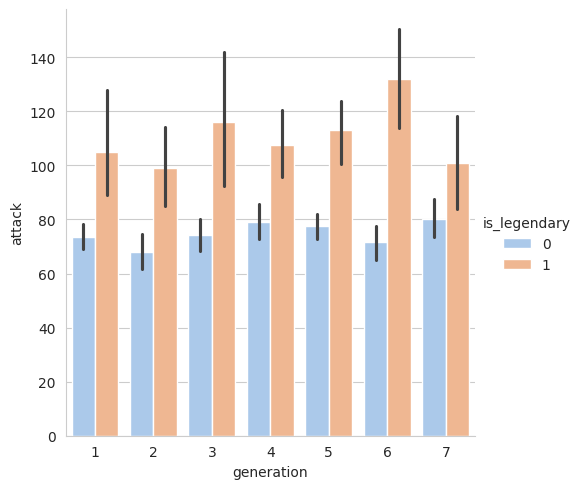

In [22]:
sns.catplot(data=pokemon, x="generation", y="attack", hue="is_legendary", kind="bar",palette="pastel")

Let us create the same plot for hp (hitpoints).

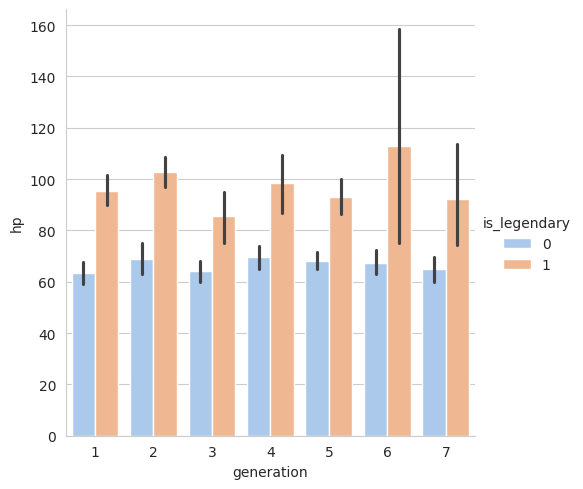

In [23]:
sns.catplot(data=pokemon, x="generation", y="hp", hue="is_legendary", kind="bar",palette="pastel")

From the plots we can deduce that legendary Pokemon have clearly greater attack and hitpoints. Also, we can notice how there is a connection of both attack and hitpoints being a bit greater for the 4th and 5th generation normal Pokemon than the other generations. Also, the legendary Pokemon of generation 6 have clearly the best stats when looking at the attack and hitpoints. Otherwise, there seems not to be any other clear patterns.

Next we investigate how does the Pokemon's Type 1 affect the attack and hp stats. As the data array, we use the complete Pokemon data since these columns do not contain any nulls. It should be noted, that in the following plots the Pokemon might have one or two types and now we are investigating how the first type affects the stats.

Let us also plot the speed in the similar way.

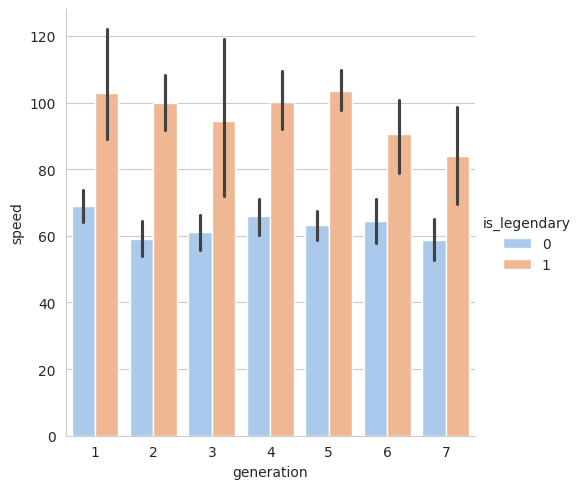

In [24]:
sns.catplot(data=pokemon, x="generation", y="speed", hue="is_legendary", kind="bar",palette="pastel")

Interestingly, also the 4th and 5th generations have a small rise compared to the earlier generations. But if the 6th generation legendary Pokemon had high values for attack and hp, it does not have them for speed.

/tmp/ipython-input-3617865263.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_attack_by_type, x='type1', y='attack', palette='viridis')


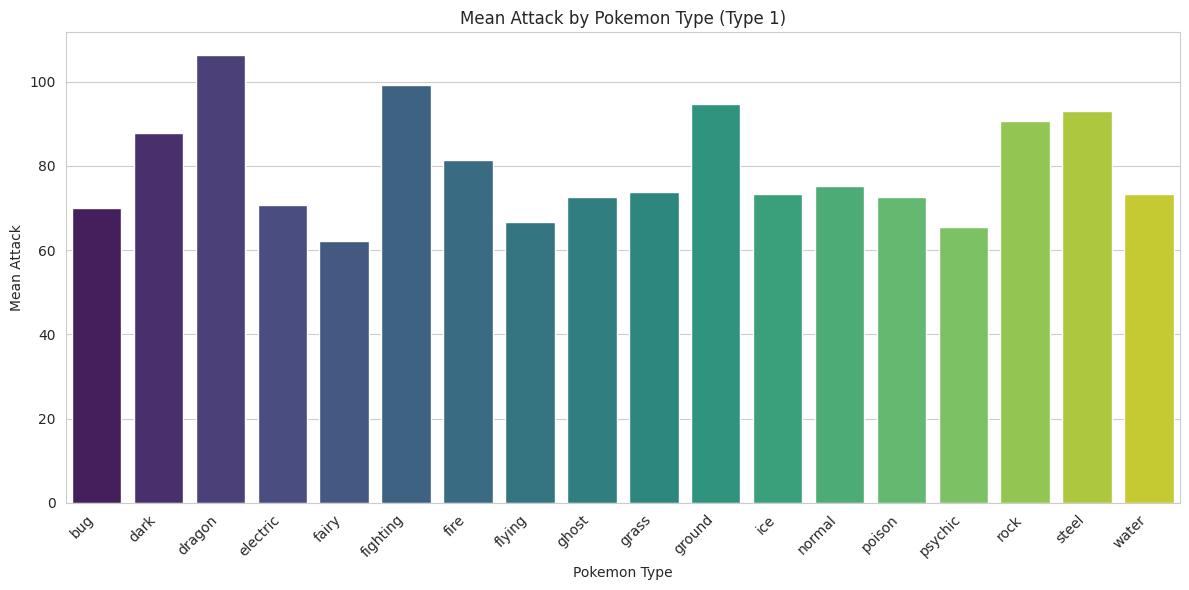

/tmp/ipython-input-3617865263.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_hp_by_type, x='type1', y='hp', palette='viridis')


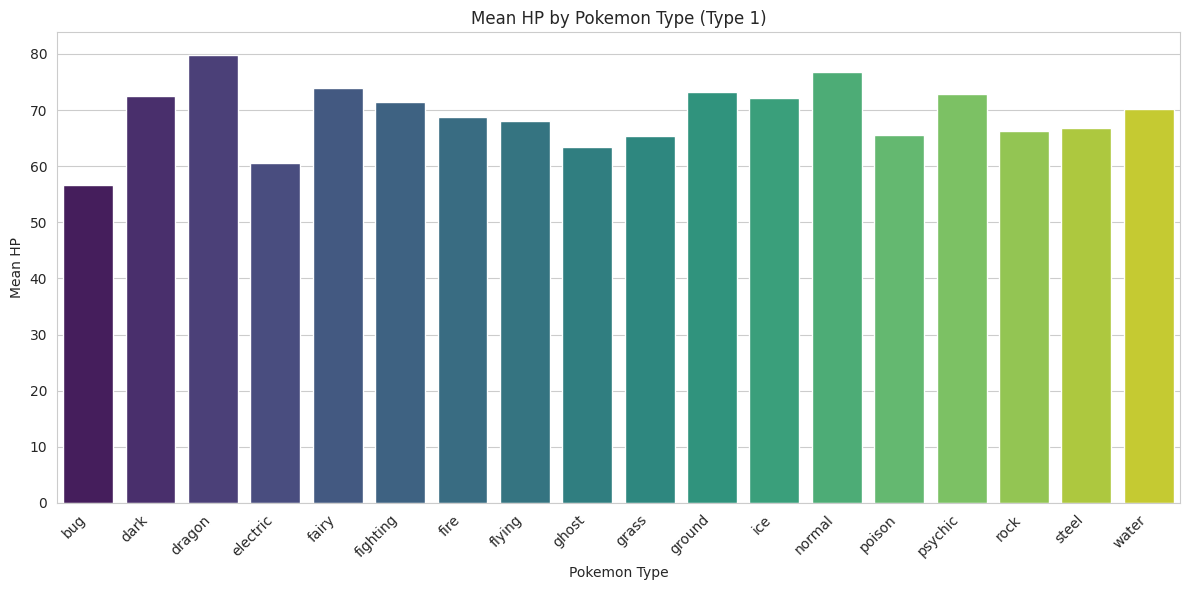

/tmp/ipython-input-3617865263.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_speed_by_type, x='type1', y='speed', palette='viridis')


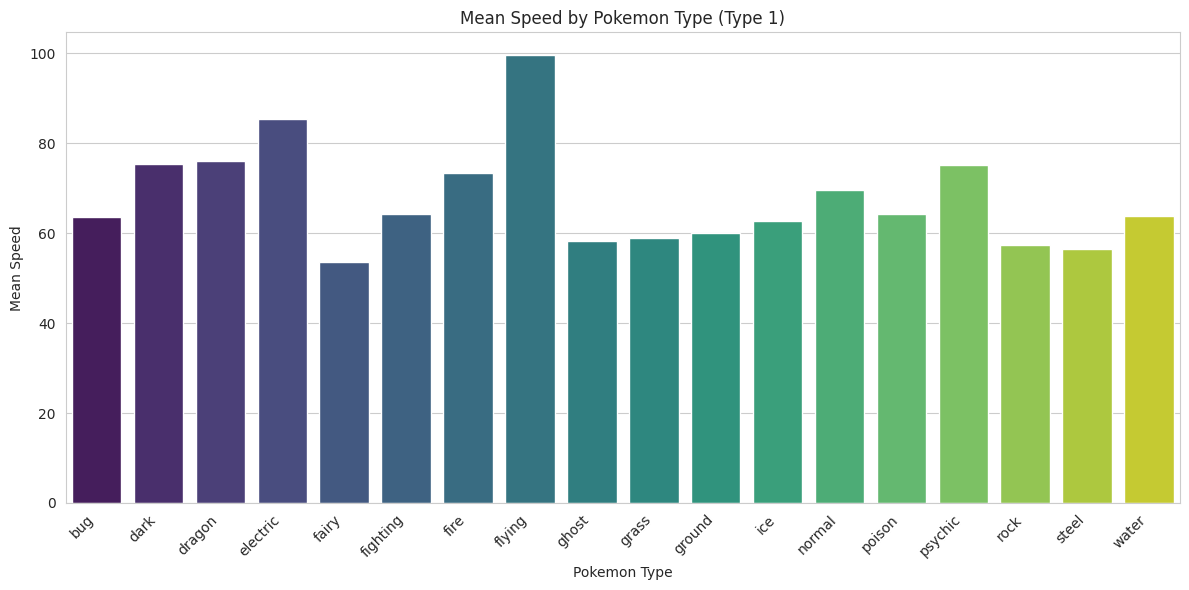

In [25]:
# Filter the DataFrame to include only the types present in pokemon_types
pokemon_filtered = pokemon[pokemon['type1'].isin(pokemon_types)]

# Calculate the mean attack and hp for each type
mean_attack_by_type = pokemon_filtered.groupby('type1')['attack'].mean().reset_index()
mean_hp_by_type     = pokemon_filtered.groupby('type1')['hp'].mean().reset_index()
mean_speed_by_type  = pokemon_filtered.groupby('type1')['speed'].mean().reset_index()

# Sort the results by type in alphabetical order
mean_attack_by_type = mean_attack_by_type.sort_values('type1')
mean_hp_by_type     = mean_hp_by_type.sort_values('type1')
mean_speed_by_type  = mean_speed_by_type.sort_values('type1')

# Create a bar plot of the mean attack by type
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_attack_by_type, x='type1', y='attack', palette='viridis')
plt.title('Mean Attack by Pokemon Type (Type 1)')
plt.xlabel('Pokemon Type')
plt.ylabel('Mean Attack')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Similarly, plot the mean hp by type
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_hp_by_type, x='type1', y='hp', palette='viridis')
plt.title('Mean HP by Pokemon Type (Type 1)')
plt.xlabel('Pokemon Type')
plt.ylabel('Mean HP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Similarly, plot the mean speed by type
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_speed_by_type, x='type1', y='speed', palette='viridis')
plt.title('Mean Speed by Pokemon Type (Type 1)')
plt.xlabel('Pokemon Type')
plt.ylabel('Mean Speed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Looking at both histogram plots of attack and hp, it seems that the best Type 1 types are dragon, fighting and ground. If we take into account speed, dragon still seems to be very good but fighting and ground not anymore.

If speed is the one attribute that the player wants the most, flying type looks to be clearly the fastest type on average. With this knowledge, combining a dragon and flying type would be the best choise. Let us next find the Pokemon that have the two types, dragon and flying, in either order as type1 and type2, and find the mean values of attack, hp and speed. Then we plot them to compare to the earlier results.

/tmp/ipython-input-4281630589.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_stats, x='stat', y='mean_value', palette='viridis')


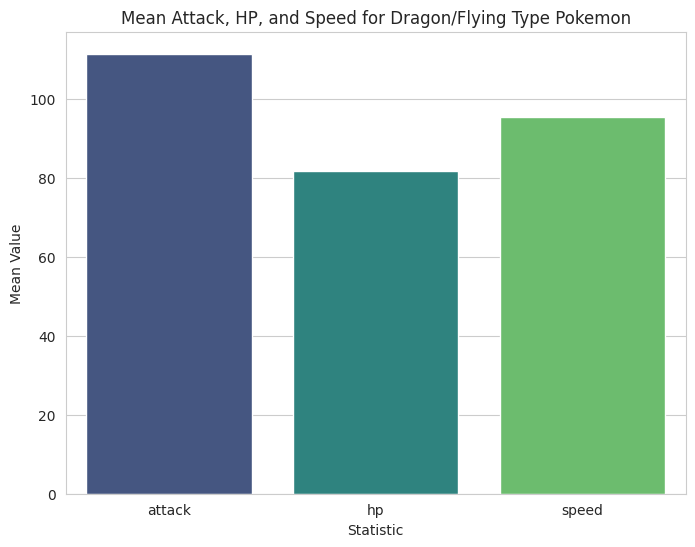

In [26]:
# Filter for Dragon/Flying type Pokemon (in either type1 or type2)
dragon_flying_pokemon = pokemon[
    ((pokemon['type1'] == 'dragon') & (pokemon['type2'] == 'flying')) |
    ((pokemon['type1'] == 'flying') & (pokemon['type2'] == 'dragon'))
]

# Calculate the mean of attack, hp, and speed for these Pokemon
mean_stats = dragon_flying_pokemon[['attack', 'hp', 'speed']].mean().reset_index()
mean_stats.columns = ['stat', 'mean_value']

# Create a bar plot of the mean stats
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_stats, x='stat', y='mean_value', palette='viridis')
plt.title('Mean Attack, HP, and Speed for Dragon/Flying Type Pokemon')
plt.xlabel('Statistic')
plt.ylabel('Mean Value')
plt.show()

Now, as we hypothized, the combination of dragon and flying type (in either order) combines the highest mean values of attack and hp that the dragon type Pokemon have and the highest mean speed that the flying type Pokemon have. We note, that we first compared only according to the first type, i.e. the type1, and used that information to see if the combination of the best type1 types add up to the best combination of type1 and type2, and it did.

In the next section we represent more distributions and show how variables are related to each other.

4. Visualización de datos

- Crear gráficos para visualizar distribuciones, relaciones entre variables y patrones
interesantes (histogramas, boxplots, scatter plots, etc.).
- Crear un heatmap para mostrar la correlación entre las variables numéricas.

In this section we try to find interesting patterns and relations of variables. We visualize the relations by doing different types of plots. We also create a heatmap to show the correlation between the variables. First, show the data set without string columns and no "against_..." colulmns.

In [27]:
pokemon_t1or2_num_noag

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,105,3840,70,475,80,70,1000000,0.9,68,50.0,779,70,70,92,19.0,7,0
779,60,5120,70,485,70,85,1000000,3.0,78,50.0,780,135,91,36,185.0,7,0
781,55,10240,70,300,45,65,1250000,0.6,45,50.0,782,45,45,45,29.7,7,0
782,75,10240,70,420,45,90,1250000,1.2,55,50.0,783,65,70,65,47.0,7,0


Now we first plot a scatter plot of some of the columns that could be correlated. Two that seem to be logarithmically related appear to be the "weight_kg" and "height_m" column

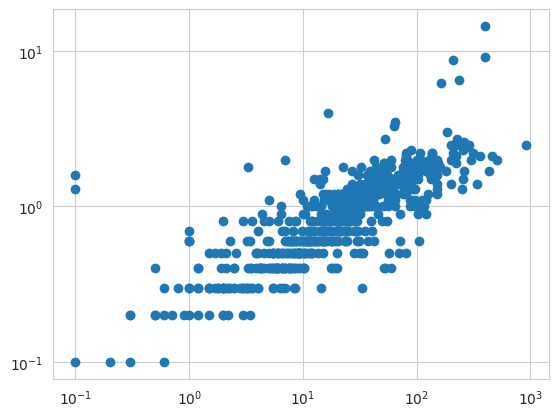

In [29]:
plt.scatter(pokemon_t1or2_num_noag["weight_kg"],pokemon_t1or2_num_noag["height_m"])
plt.xscale('log') # Set x-axis to logarithmic scale
plt.yscale('log') # Set y-axis to logarithmic scale
plt.show()

For the relation between "percentage_male" and "base_total" there doesn't seem to be any function relation other than some apparent repeated values of percentage_male with bigger or smaller values piled on top of each other.

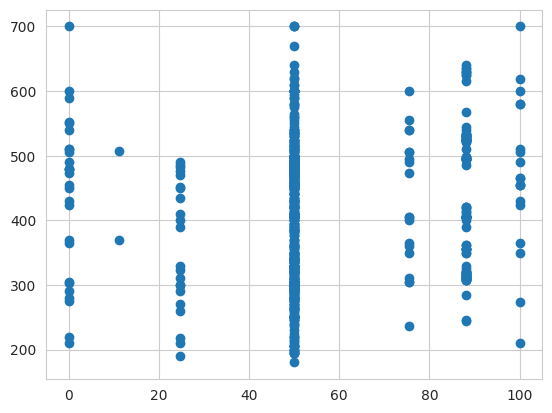

In [32]:
plt.scatter(pokemon_t1or2_num_noag["percentage_male"],pokemon_t1or2_num_noag["base_total"])
#plt.xscale('log') # Set x-axis to logarithmic scale
#plt.yscale('log') # Set y-axis to logarithmic scale
plt.show()

Between "capture_rate" and "base_total" we obtain another hard to interpret graph where no direct correlation between parameters is observed. Although there seems to be a concentration of higher reaching total base stats for higher capture_rates.

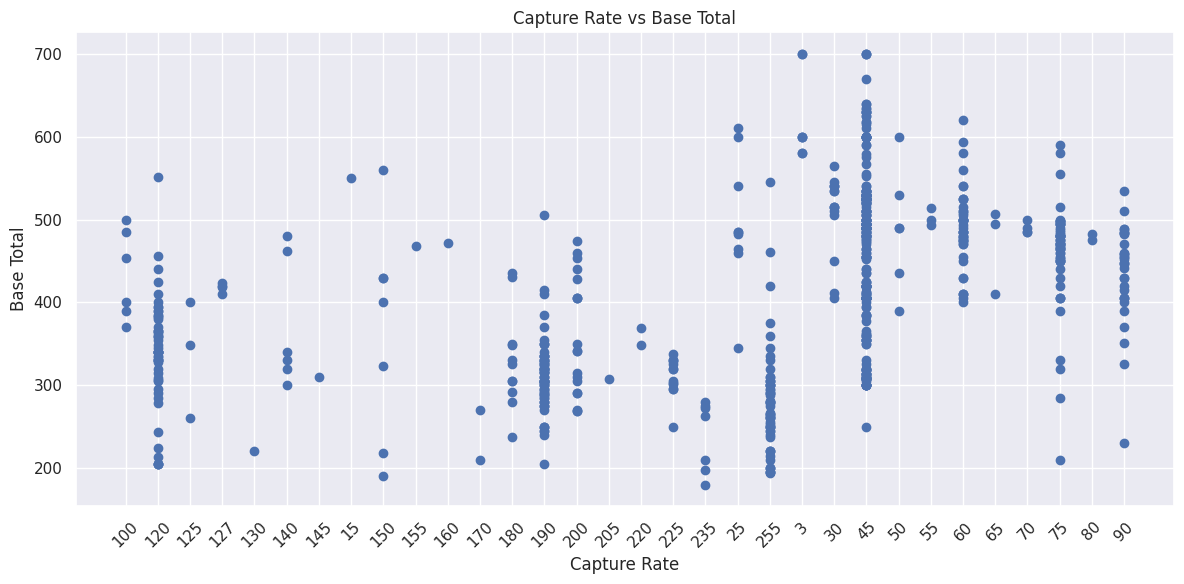

In [43]:
# Enchanced plot from chatgpt adding separation to the x axis numbers and sorting them from lowest to highest
pokemon_sorted = pokemon_t1or2_num_noag.sort_values(by="capture_rate")

plt.figure(figsize=(12, 6))
plt.scatter(pokemon_sorted["capture_rate"], pokemon_sorted["base_total"])
plt.xlabel("Capture Rate")
plt.ylabel("Base Total")
plt.title("Capture Rate vs Base Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Then we create the heatmaps about the base_total stat of different type of Pokemon in different generations. We make a heatmap for both, how primary and secondary type affect the base_total stat. As the data we will use the original Pokemon data because there were not any numerical nulls in base_total stat.

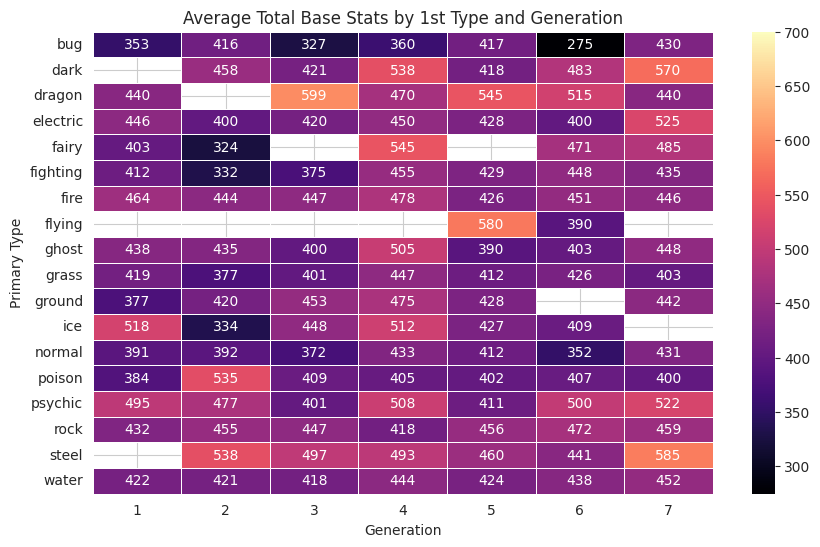

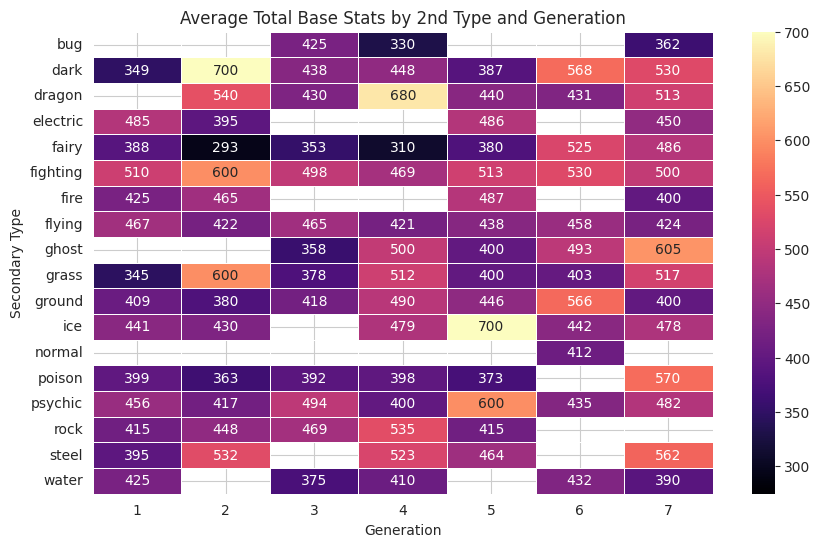

In [ ]:
# It was asked to ChatGPT after importing the pokemon.csv file:
# How to generate a sns heatmap with the correct syntax to plot the
# numerical and string data together without breaking

# To what the syntax of aggfunc="mean" was obtained, a really useful tool
# to combine many data that would leave many blank spaces when plotted.

# Create pivot table for type 1. The pivot_table requires to know what is the attribute
# to put as rows (index) and as columns (columns) and also which numerical
# value is put into each cell (values) and finally what is the statistical
# calculation that is done to the values of each cell (aggfunc), which can be
# median, sum or mean. Mean is used here.
pokemon_heatmap_type1 = pokemon.pivot_table(
    index="type1",
    columns="generation",
    values="base_total",
    aggfunc="mean"
)

# Create pivot table for type2
pokemon_heatmap_type2 = pokemon.pivot_table(
    index="type2",
    columns="generation",
    values="base_total",
    aggfunc="mean"
)

# Find the global minimum and maximum values across both heatmaps so that
# the two heatmaps are comparable
global_vmin = min(pokemon_heatmap_type1.min().min(), pokemon_heatmap_type2.min().min())
global_vmax = max(pokemon_heatmap_type1.max().max(), pokemon_heatmap_type2.max().max())


# Plot heatmap for type1 with fixed scale
plt.figure(figsize=(10, 6))
sns.heatmap(pokemon_heatmap_type1, annot=True, cmap='magma', fmt=".0f", linewidths=.5, vmin=global_vmin, vmax=global_vmax)
plt.title("Average Total Base Stats by 1st Type and Generation")
plt.xlabel("Generation")
plt.ylabel("Primary Type")
plt.show()


# Plot heatmap for type2 with fixed scale
plt.figure(figsize=(10, 6))
sns.heatmap(pokemon_heatmap_type2, annot=True, cmap='magma', fmt=".0f", linewidths=.5, vmin=global_vmin, vmax=global_vmax)
plt.title("Average Total Base Stats by 2nd Type and Generation")
plt.xlabel("Generation")
plt.ylabel("Secondary Type")
plt.show()

As we concluded in section 3 of this exercise, we see how having two types increases the stats of a Pokemon. Also, we see again how dragon and flying types are averagely better than most other types.

According to the heatmaps, the best primary type is dragon in the 2nd generation and the best secondary types dark in the 2nd and ice in the 5th generations (with dragon in the 4th generation close to the other two). Similarly, the worst primary type to have is bug in the 6th generation and the worst secondary type is fairy in the 2nd generation.

5. Análisis de correlación

- Calcular la matriz de correlación y discutir sobre las relaciones encontradas entre las
variables.
- Identificar cuáles variables parecen estar más relacionadas entre sí y qué implicaciones
podría tener esto para futuros modelos de machine learning.

Now, we will create similar heatmaps as in section 4, but now comparing how the mean of the base_total stats of the combinations of type1 and type2 behave, i.e. we compare which double-type-Pokemon have the best base_total stats.

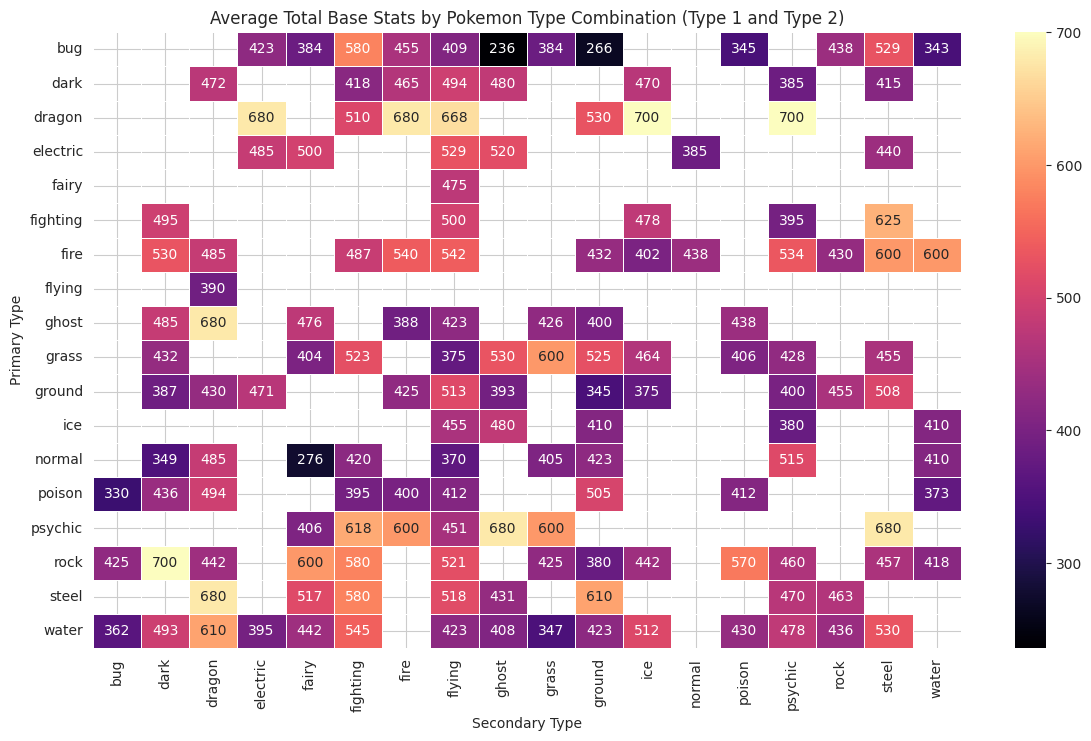

In [ ]:
# Create a pivot table with type1 as index, type2 as columns, and mean of base_total as values
pokemon_type_combination_heatmap = pokemon.pivot_table(
    index="type1",
    columns="type2",
    values="base_total",
    aggfunc="mean"
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pokemon_type_combination_heatmap, annot=True, cmap='magma', fmt=".0f", linewidths=.5)
plt.title("Average Total Base Stats by Pokemon Type Combination (Type 1 and Type 2)")
plt.xlabel("Secondary Type")
plt.ylabel("Primary Type")
plt.show()

As in the previous sections, we see how again having dragon as either of the types has the best stats. Also, we notice how having psychic as the primary type with combination of many other secondary types results in strong total_base stat.

We observe from the correlation matrix of Primary Type and Secondary Type with hue of total base stats that there seems to be type combinations that tend to be really weak or really strong on average.
For example, the weakests in black:
Bug/Ghost: 236
Bug/Ground: 266
Normal/Fairy: 276}

And the strongests in light cream colour:
Rock/Dark: 700
Dragon/Ice: 700
Dragon/Psychic: 700

6. Conclusiones

- Resumir los hallazgos principales del análisis.
- Proponer hipótesis que podrían ser investigadas con modelos de machine learning en el
futuro.

In resumee, after stripping the dataset from null data and cleaning it of other undesired data orders through sorting when it finally came to plot them in graphs and relation matrixes, we obtained some conclusive data about legendary pokemon with the 1 attribute (that they indeed are yes legendary) tend to have higher stats than all the other pokemon, and particularly about type stats, that bug type is one of the weakest types and dragon being the strongest in terms of total base stats, the possible hypothesis could be that dragon pokemon tend to be more legendary pokemon proportionally, adding to that the dragon/flying type combination seems to be the strongest one of all type combinations.
Plus also the more weight a pokemon had it tended to have more height in a logarithmic relationship.

Also a clear trend was found about pokemon with both type1 and type2 trending to having highers stats on average than pokemon with only type1 and having type2 as null.

About individual stats, in the attack stat, dragon, fighting and ground correspond to be the pokemon types with the highest values, meanwhile fairy, psychic and flying are the ones with the weakest attack stat on average.

For the types with highest hp stat, dragon, normal, fairy and ground are the winners, while bug, electric and ghost are the types with least hp on average.

And finally for the speed stat, flying and electric types remarkably have the highest speed stats, wile the slowest pokemon types correspond to fairy, steel and rock. Which makes sense in a conceptual way as rock and steel seem to be materials that are hard to be moved.


Apéndice

Los prompts para ChatGPT (y otras)

Explicaciones para el uso de IA (porque, para que?)